In [1]:
# import...
import os
import sys
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

sys.path.append("/Users/etmu9498/research/code/scripts-winter2023/")
import helper_fns_winter2023
sys.path.append("/Users/etmu9498/research/code/scripts-winter2023/cloud-top-height-stats")
import cloud_top_plotting_clusters as clusters
import cloud_top_plotting_multi_layers as multi

os.chdir("/Users/etmu9498/research/code/scripts")
import tc_metadata
import helper_fns
import make_plots_new_heights
import cloud_height

In [2]:
# goal #1: create cloud cluster plots using current algorithms
inputdict={}
inputdict['2021'] = ['P3_20210929H2_processed.nc']
inputdict['2022'] = ['P3_20221007H1_processed.nc']

tc = 'all'
df_clusters2 = clusters.plot_all_cloud_clusters(tc=tc, low_pass_filt=False, cluster_threshold=250, min_size=2, cluster_type='250m-improved', savefig=False)
# df_clusters4 = clusters.plot_all_cloud_clusters(tc=tc, low_pass_filt=False, cluster_threshold=250, min_size=10, cluster_type='250m-improved', savefig=False)

Number of data files to be plotted: 35
data saved to: /Users/etmu9498/research/figures/CRL-all-data-processed/"year"-clusters-"cluster type
[['P3_20210811H1_processed.nc', 'P3_20210812H1_processed.nc', 'P3_20210812H2_processed.nc', 'P3_20210813H1_processed.nc', 'P3_20210816H1_processed.nc', 'P3_20210817H1_processed.nc', 'P3_20210818H1_processed.nc', 'P3_20210819H1_processed.nc', 'P3_20210820H1_processed.nc', 'P3_20210821H2_processed.nc', 'P3_20210827H1_processed.nc', 'P3_20210828H1_processed.nc', 'P3_20210829H1_processed.nc', 'P3_20210925H1_processed.nc', 'P3_20210926H1_processed.nc', 'P3_20210927H1_processed.nc', 'P3_20210929H2_processed.nc'], ['P3_20220830H1_processed.nc', 'P3_20220831H1_processed.nc', 'P3_20220901H1_processed.nc', 'P3_20220903H1_processed.nc', 'P3_20220904H1_processed.nc', 'P3_20220905H1_processed.nc', 'P3_20220906H1_processed.nc', 'P3_20220908H1_processed.nc', 'P3_20220916H1_processed.nc', 'P3_20220917H1_processed.nc', 'P3_20220918H1_processed.nc', 'P3_20220920H1_p

In [4]:
all_clusters2 = df_clusters2['cluster sizes (km)']
all_heights2 = df_clusters2['cluster mean heights (km)']

# all_clusters4 = df_clusters4['cluster sizes (km)']

# flatten cloud cluster vertical and horizontal sizes here!
cluster_size2, cluster_height2 = [], []
for i, val in enumerate(all_clusters2):
    cluster_size2 += val
    cluster_height2 += all_heights2[i]

# for i, val in enumerate(all_clusters4):
#     cluster_size4 += val
    
# print(cluster_size)

df_clusters2

,year,date,pass,cluster sizes (km),cluster mean heights (km)
0,2021,0812,0,"[1.56, 2.8600000000000003, 1.04, 3.90000000000...","[2.2049112517568097, 1.6266563680951258, 2.263..."
1,2021,0812,1,"[1.3, 4.94, 0.52, 3.12, 1.04, 0.52, 1.04, 1.04...","[0.6833893007661225, 1.3739181114380268, 1.471..."
2,2021,0812,2,"[1.82, 39.52, 26.78, 18.98]","[1.0631618019890554, 1.7857759065298877, 1.911..."
3,2021,0812,0,"[13.26, 1.3, 1.82, 3.12, 0.78, 1.82, 9.36, 2.6...","[2.8902031562502284, 3.061700588344675, 2.8482..."
4,2021,0812,1,"[0.78, 0.78, 1.3, 1.04, 0.52, 0.52, 1.04, 0.52...","[0.7929692056507969, 1.238192618483519, 0.8192..."
...,...,...,...,...,...
81,2022,1007,1,"[1.3, 0.52, 0.52, 1.04, 0.52, 0.78, 0.52, 1.56...","[1.8412359701802865, 0.746607597771677, 1.7990..."
82,2022,1007,2,"[1.56, 0.78, 1.3, 2.6]","[1.0241391140195144, 0.4177006483504501, 0.381..."
83,2022,1008,0,"[3.64, 0.52, 0.78, 0.52, 1.04, 0.52, 0.52, 0.7...","[2.9480308853880155, 2.730150307729103, 2.5904..."
84,2022,1008,1,"[1.3, 0.78, 1.3, 1.3, 0.52, 0.78, 1.82, 0.52, ...","[2.1157964505170677, 1.729125947647993, 2.0431..."


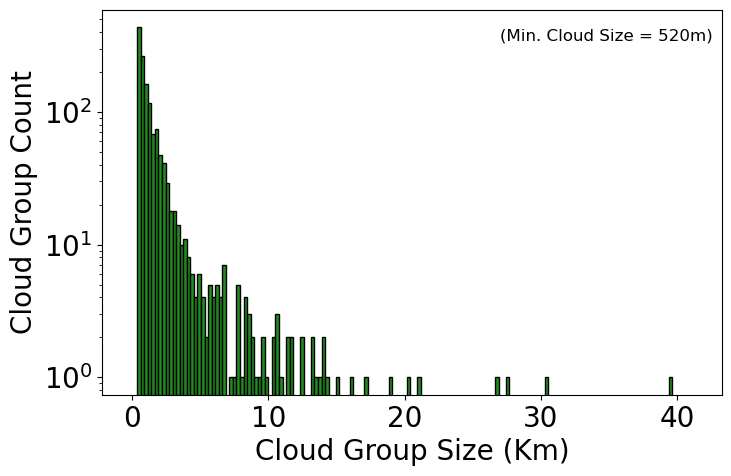

In [6]:
# simple plot showing horizontal distributions for all clusters
plt.figure(figsize=(8, 5))

# binwidth = same size as cloud height bins!
bw1 = (2*130) / 1000
xinc1 = np.arange(0, np.nanmax(np.array(cluster_size2)) + 2.0, bw1)

hx=np.histogram( cluster_size2,xinc1)
plt.rcParams["figure.figsize"] = [5,5]
plt.bar(hx[1][:-1],hx[0],edgecolor = 'k', color = 'forestgreen', width = bw1, linewidth = 1) # , label='Min Size = 260m')
plt.ylabel('Cloud Group Count')
plt.xlabel('Cloud Group Size (Km)')

plt.text(27, 350, "(Min. Cloud Size = 520m)", fontsize=12)

'''
# repeat after removing 2 and 3 width small clusters
hx=np.histogram( cluster_size4,xinc1)
plt.rcParams["figure.figsize"] = [5,5]
plt.bar(hx[1][:-1],hx[0],edgecolor = 'k', color = 'cyan', alpha=.5, width = bw1, linewidth = 1, label='Min Size = 520m')
plt.ylabel('Count')
plt.xlabel('Cloud Cluster Size (Km)')
''' 



# plt.legend(loc='upper right')
plt.yscale('log')

In [7]:
# find the mean cluster size
all_meansizes = []

for group in df_clusters2['cluster sizes (km)']:
    all_meansizes += group

print(len(all_meansizes))
print(np.nanmean(all_meansizes))

1413
1.7292852087756547


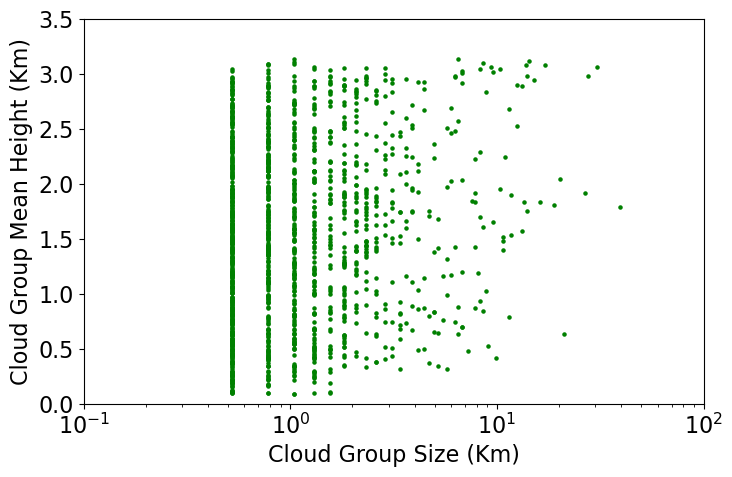

In [8]:
# scatter plot showing horizontal vs vertical distributions for all clusters
plt.figure(figsize=(8, 5))
helper_fns_winter2023.change_font_sizes(16,16)

# binwidth = same size as cloud height bins!
plt.scatter( cluster_size2, cluster_height2, c='g', s=5)
plt.ylabel('Cloud Group Mean Height (Km)')
plt.xlabel('Cloud Group Size (Km)')

# plt.text(27, 350, "(Min. Cloud Size = 520m)", fontsize=12)

plt.xlim([.1, 100])
plt.ylim(0, 3.5)
plt.xscale('log')


[  0.1          0.16378937   0.26826958   0.43939706   0.71968567
   1.17876863   1.93069773   3.16227766   5.17947468   8.48342898
  13.89495494  22.75845926  37.2759372   61.05402297 100.        ]
[0.         0.58333333 1.16666667 1.75       2.33333333 2.91666667
 3.5       ]
1413
number of column data points = 0.0
number of column data points = 0.0
number of column data points = 0.0
number of column data points = 435.0
number of column data points = 262.0
number of column data points = 280.0
number of column data points = 230.0
number of column data points = 108.0
number of column data points = 47.0
number of column data points = 28.0
number of column data points = 16.0
number of column data points = 5.0
number of column data points = 2.0
number of column data points = 0.0
number of column data points = 0.0


C:\Users\etmu9498\AppData\Local\Temp\ipykernel_19472\2585172772.py:49: RuntimeWarning: invalid value encountered in divide
  cloud_matrix_normal[radius_i, :] = xaxis_row / divideval


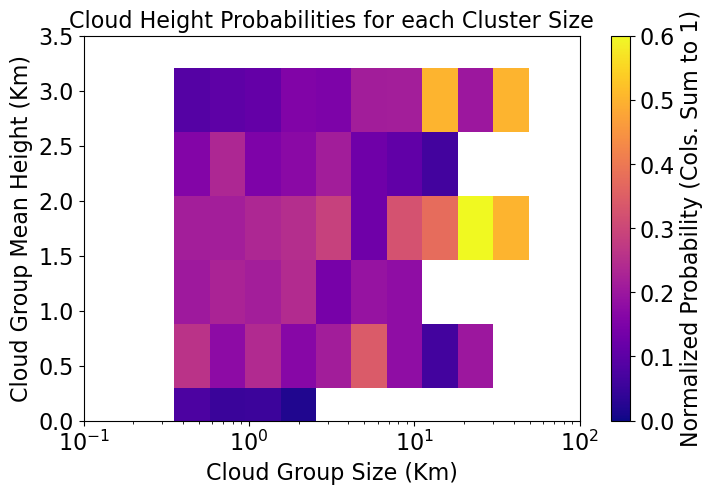

In [9]:
# the same plot as above, except it's in heatmap form!

count1, count2 = 15, 7
size_bins = np.logspace(-1, 2, num=count1)
height_bins = np.linspace(0, 3.5, num=count2)

print(size_bins)
print(height_bins)

cloud_matrix = np.zeros( (len(size_bins), len(height_bins)))

cloud_count = 0

# go through all of the passes
for passi, passval in enumerate(df_clusters2['cluster mean heights (km)']):
    
    # look at the current cloud height
    for heighti, heightval in enumerate( passval):
        xsize = df_clusters2['cluster sizes (km)'][passi][heighti]

        # find the closest sizebin!
        sizebini = np.argmin( np.abs( size_bins - xsize))
        # find the closest height bin!
        heightbini = np.argmin( np.abs( height_bins - heightval))
        
        # add one to this size / height bin combo!
        cloud_matrix[sizebini, heightbini] += 1
        
        cloud_count += 1
        
print(cloud_count)


# normalize the distribution?!?
cloud_matrix_normal = np.copy( cloud_matrix)
# do this for every x axis distance
for radius_i in range(np.shape(cloud_matrix)[0]):
    # locally define the row of w probabilities for this given radial distance
    xaxis_row = cloud_matrix[radius_i, :]
    # count the number of cloud clusters for each given x distance limit (.2-.3, .3-.4 km, etc)
    w_sum = 0
    for wi in xaxis_row:
        w_sum += wi           
    print("number of column data points = " + str(w_sum))

    # the value to divide all counts by at this radial distance: w_sum_i / divideval = 100 (%)
    divideval = w_sum
    # scale the count density axis!
    cloud_matrix_normal[radius_i, :] = xaxis_row / divideval
    
# turn remaining zero counts into nans for prettier plotting
for radius_i in range(np.shape(cloud_matrix)[0]):
    xaxis_row = cloud_matrix[radius_i, :]
    xaxis_row_norm = cloud_matrix_normal[radius_i, :]

    cloud_matrix[radius_i, np.where(xaxis_row == 0)[0]] = np.nan
    cloud_matrix_normal[radius_i, np.where(xaxis_row_norm == 0)[0]] = np.nan
    
plt.figure(figsize=(8, 5))
helper_fns_winter2023.change_font_sizes(16,16)

# binwidth = same size as cloud height bins!
plt.pcolormesh( size_bins, height_bins, cloud_matrix_normal.transpose(), cmap='plasma', vmin=.0) #  norm=matplotlib.colors.LogNorm())

# plt.colorbar(label='Count')
plt.title("Cloud Height Probabilities for each Cluster Size")
plt.colorbar(label='Normalized Probability (Cols. Sum to 1)')
plt.ylabel('Cloud Group Mean Height (Km)')
plt.xlabel('Cloud Group Size (Km)')

plt.xlim([.1, 100])
plt.ylim(0, 3.5)
plt.xscale('log')


[  0.1          0.16378937   0.26826958   0.43939706   0.71968567
   1.17876863   1.93069773   3.16227766   5.17947468   8.48342898
  13.89495494  22.75845926  37.2759372   61.05402297 100.        ]
[0.25 0.75 1.25 1.75 2.25 2.75 3.25]
1413
number of column data points = 165.0
number of column data points = 262.0
number of column data points = 271.0
number of column data points = 281.0
number of column data points = 215.0
number of column data points = 191.0
number of column data points = 28.0


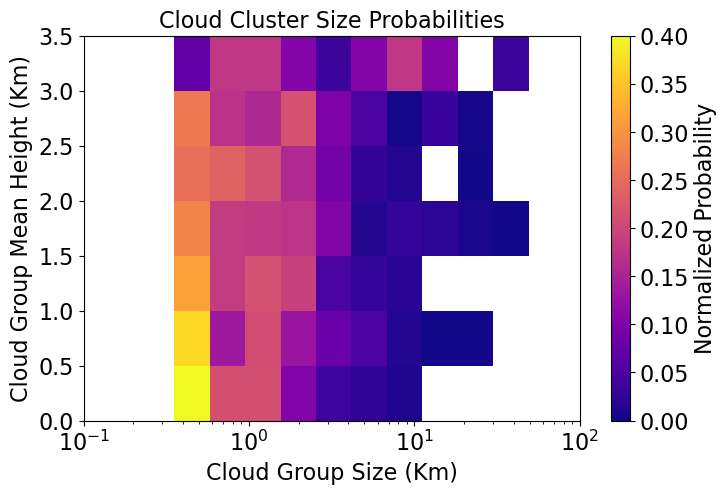

In [15]:
# 6/21/23 update: similar to the plot above, except that the probability is normalized across rows, not columns. 
# Also, larger bins are used here.
# to look at full counts, just use the cloud_matrix, not the normalized one

count1, count2 = 15, 6
# size_bins = np.linspace(0, 50, num=count1)
size_bins = np.logspace(-1, 2, num=count1)
height_bins = np.array([.25, .75, 1.25, 1.75, 2.25, 2.75, 3.25]) #  np.linspace(0, 3.5, num=count2)

print(size_bins)
print(height_bins)

cloud_matrix = np.zeros( (len(size_bins), len(height_bins)))

cloud_count = 0

# go through all of the passes
for passi, passval in enumerate(df_clusters2['cluster mean heights (km)']):
    
    # look at the current cloud height
    for heighti, heightval in enumerate( passval):
        xsize = df_clusters2['cluster sizes (km)'][passi][heighti]

        # find the closest sizebin!
        sizebini = np.argmin( np.abs( size_bins - xsize))
        # find the closest height bin!
        heightbini = np.argmin( np.abs( height_bins - heightval))
        
        # add one to this size / height bin combo!
        cloud_matrix[sizebini, heightbini] += 1
        
        cloud_count += 1
        
print(cloud_count)


# normalize the distribution?!?
cloud_matrix_normal = np.copy( cloud_matrix)

# do this for every cloud height
for radius_i in range(np.shape(cloud_matrix)[1]):
    # locally define the row of w probabilities for this given radial distance
    xaxis_column = cloud_matrix[:, radius_i]
    # count the number of cloud clusters for each given x distance limit (.2-.3, .3-.4 km, etc)
    w_sum = 0
    for wi in xaxis_column:
        w_sum += wi           
    print("number of column data points = " + str(w_sum))

    # the value to divide all counts by at this radial distance: w_sum_i / divideval = 100 (%)
    divideval = w_sum
    # scale the count density axis!
    cloud_matrix_normal[:, radius_i] = xaxis_column / divideval
    
# turn remaining zero counts into nans for prettier plotting
for radius_i in range(np.shape(cloud_matrix)[0]):
    xaxis_row = cloud_matrix[radius_i, :]
    xaxis_row_norm = cloud_matrix_normal[radius_i, :]

    cloud_matrix[radius_i, np.where(xaxis_row == 0)[0]] = np.nan
    cloud_matrix_normal[radius_i, np.where(xaxis_row_norm == 0)[0]] = np.nan
    
plt.figure(figsize=(8, 5))
helper_fns_winter2023.change_font_sizes(16,16)

# binwidth = same size as cloud height bins!

plt.pcolormesh( size_bins, height_bins, cloud_matrix_normal.transpose(), cmap='plasma', vmin=.0) #  norm=matplotlib.colors.LogNorm())
# plt.pcolormesh( size_bins, height_bins, cloud_matrix.transpose(), cmap='plasma', vmin=.0) #  norm=matplotlib.colors.LogNorm())

# plt.colorbar(label='Count')
plt.title("Cloud Cluster Size Probabilities")
plt.colorbar(label='Normalized Probability')
plt.ylabel('Cloud Group Mean Height (Km)')
plt.xlabel('Cloud Group Size (Km)')

plt.xlim([.1, 100])
plt.ylim(0, 3.5)
plt.xscale('log')

number of cloud cluster points: 140


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


number of x axis points: 254
number of cluster x axis points: 140


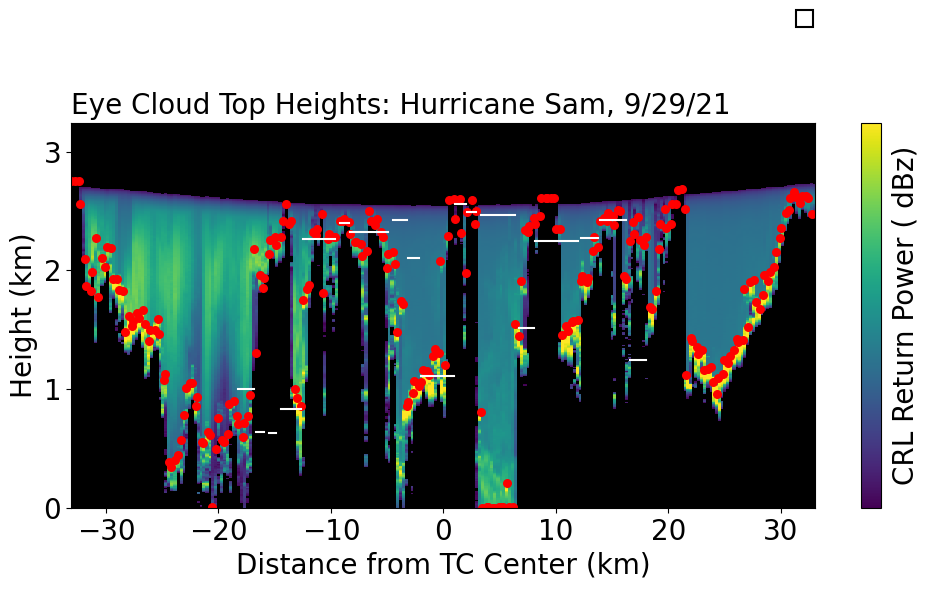

In [5]:
# broken code: trying to plot cloud clusters over original crl data for some reason. 
# theres probs a better way to do this! maybe steal code from Figure 2 notebook to auto make a nice x axis for +- distance?

'''
# new data- hard to use with old code :/
# crl_path = "/Users/etmu9498/research/data/crl-all-data-processed/2021/"
# crl_name = "P3_20210929H2_processed.nc"
# os.chdir(crl_path)
# crl_data = xr.open_dataset(crl_name)

# new code: get cloud clusters for this day
manual_heights = [[998.6505129754229, 998.6505129754229, 998.6505129754229, 998.6505129754229, 998.6505129754229, 998.6505129754229], 
                  [639.6813756711927, 639.6813756711927, 639.6813756711927, 639.6813756711927], 
                  [633.6126446833908, 633.6126446833908, 633.6126446833908, 633.6126446833908], 
                  [832.7110330172316, 832.7110330172316, 832.7110330172316, 832.7110330172316, 832.7110330172316, 832.7110330172316, 832.7110330172316, 832.7110330172316], 
                  [2264.039452519411, 2264.039452519411, 2264.039452519411, 2264.039452519411, 2264.039452519411, 2264.039452519411, 2264.039452519411, 2264.039452519411, 2264.039452519411, 2264.039452519411, 2264.039452519411, 2264.039452519411], 
                  [2397.5058041683524, 2397.5058041683524, 2397.5058041683524, 2397.5058041683524], 
                  [2324.6921623496974, 2324.6921623496974, 2324.6921623496974, 2324.6921623496974, 2324.6921623496974, 2324.6921623496974, 2324.6921623496974, 2324.6921623496974, 2324.6921623496974, 2324.6921623496974, 2324.6921623496974, 2324.6921623496974, 2324.6921623496974, 2324.6921623496974], 
                  [2424.337660876225, 2424.337660876225, 2424.337660876225, 2424.337660876225, 2424.337660876225, 2424.337660876225], [2104.9726176952804, 2104.9726176952804, 2104.9726176952804, 2104.9726176952804], 
                  [1106.6994288429642, 1106.6994288429642, 1106.6994288429642, 1106.6994288429642, 1106.6994288429642, 1106.6994288429642, 1106.6994288429642, 1106.6994288429642, 1106.6994288429642, 1106.6994288429642, 1106.6994288429642, 1106.6994288429642], 
                  [2557.9830938787013, 2557.9830938787013, 2557.9830938787013, 2557.9830938787013], 
                  [2491.7481106143737, 2491.7481106143737, 2491.7481106143737, 2491.7481106143737], 
                  [2468.356900959407, 2468.356900959407, 2468.356900959407, 2468.356900959407, 2468.356900959407, 2468.356900959407, 2468.356900959407, 2468.356900959407, 2468.356900959407, 2468.356900959407, 2468.356900959407, 2468.356900959407, 2468.356900959407], 
                  [1518.830609997516, 1518.830609997516, 1518.830609997516, 1518.830609997516, 1518.830609997516, 1518.830609997516], 
                  [2244.177293439383, 2244.177293439383, 2244.177293439383, 2244.177293439383, 2244.177293439383, 2244.177293439383, 2244.177293439383, 2244.177293439383, 2244.177293439383, 2244.177293439383, 2244.177293439383, 2244.177293439383, 2244.177293439383, 2244.177293439383, 2244.177293439383], 
                  [2269.0287817054004, 2269.0287817054004, 2269.0287817054004, 2269.0287817054004, 2269.0287817054004, 2269.0287817054004, 2269.0287817054004], 
                  [2427.65208009441, 2427.65208009441, 2427.65208009441, 2427.65208009441, 2427.65208009441, 2427.65208009441, 2427.65208009441, 2427.65208009441, 2427.65208009441, 2427.65208009441], 
                  [1243.974269968085, 1243.974269968085, 1243.974269968085, 1243.974269968085, 1243.974269968085, 1243.974269968085, 1243.974269968085]]

count = 0
for i in range(len(manual_heights)):
    count += len( manual_heights[i])
print('number of cloud cluster points: ' + str(count))
    
# setup: choose the 9/29 eye pass 1 dataset
metadata = tc_metadata.all_data( tc='sam')
crl_path = metadata['um_crl_path']
crl_name = 'crl-sam-09-29-eye-1.nc'
dataset = 5

# load data and helpful values
os.chdir( crl_path)
crl_data = xr.open_dataset( crl_name)
xaxis_data = crl_data.in_situ_distance.values
dist0 = metadata[ 'in_situ_eyewall_dists'][dataset][ 0] # eyewall limit 0
dist1 = metadata[ 'in_situ_eyewall_dists'][dataset][ 1] # eyewall limit 1

# find the indices and values in the crl distance dataset closest to the eyewall_dists limits
i1, x1 = helper_fns.closest_val( xaxis_data, dist0)
i2, x2 = helper_fns.closest_val( xaxis_data, dist1)

# cloud heights within the specified axes
cloud_heights, cloudxaxis = cloud_height.find_cloud_heights( crl_name, -30, i1, i2, xaxis='in-situ-dist', crl_path=crl_path, new_heights=True)

# setup for plotting
power = crl_data.power_new[i1:i2].values
dist = crl_data.in_situ_distance[i1:i2].values


fig = plt.figure( figsize=(12, 5))
xtxt = -31
ytxt = 2.8
fs = 20
helper_fns.change_font_sizes(small=fs, medium=fs)

# plot things
xaxis = crl_data.in_situ_distance
plt.pcolormesh(  xaxis, - crl_data.H_new, crl_data.power_new.transpose(), vmin = -30, vmax =-10)
plt.scatter( cloudxaxis, cloud_heights, c='r', s=30)
print('number of x axis points: ' + str(len(cloudxaxis)))

clusterxaxis = cloudxaxis[57:-57]
print('number of cluster x axis points: ' + str(len(clusterxaxis)))
# plot the cluster heights! 
xcount = 0
for i in range(len(manual_heights)):
    meanh = np.array(manual_heights[i]) / 1000.
    xvals = clusterxaxis[xcount : xcount + len(meanh)]
    plt.plot(xvals, meanh, c='w')
    
    xcount += len(meanh)


plt.title( "Eye Cloud Top Heights: Hurricane Sam, 9/29/21", loc='left')
plt.xlim( [x1, x2])
plt.xlabel("Distance from TC Center (km)")
plt.ylim( [ 0, crl_data.H_max + .1])
plt.ylabel( 'Height (km)')    

cbar = plt.colorbar(label="CRL Return Power ( dBz)", ticks=[-30, -20, -10])
cbar.ax.set_ylabel( ylabel="CRL Return Power ( dBz)")
cbar.ax.tick_params(labelsize=21)
ax = plt.gca()
ax.set_facecolor('k')

leg = plt.legend( loc='upper right', bbox_to_anchor=(1.011, 1.32), fancybox=False, shadow=False, fontsize=fs*.75, facecolor='w', framealpha=1) # 1.3
leg.get_frame().set_linewidth( 1.5) 
leg.get_frame().set_edgecolor('k')
'''